### **EXPLORATORY ANALYSIS USING PANDAS**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# First, let's read the SpaceX dataset into a Pandas dataframe and print its summary
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


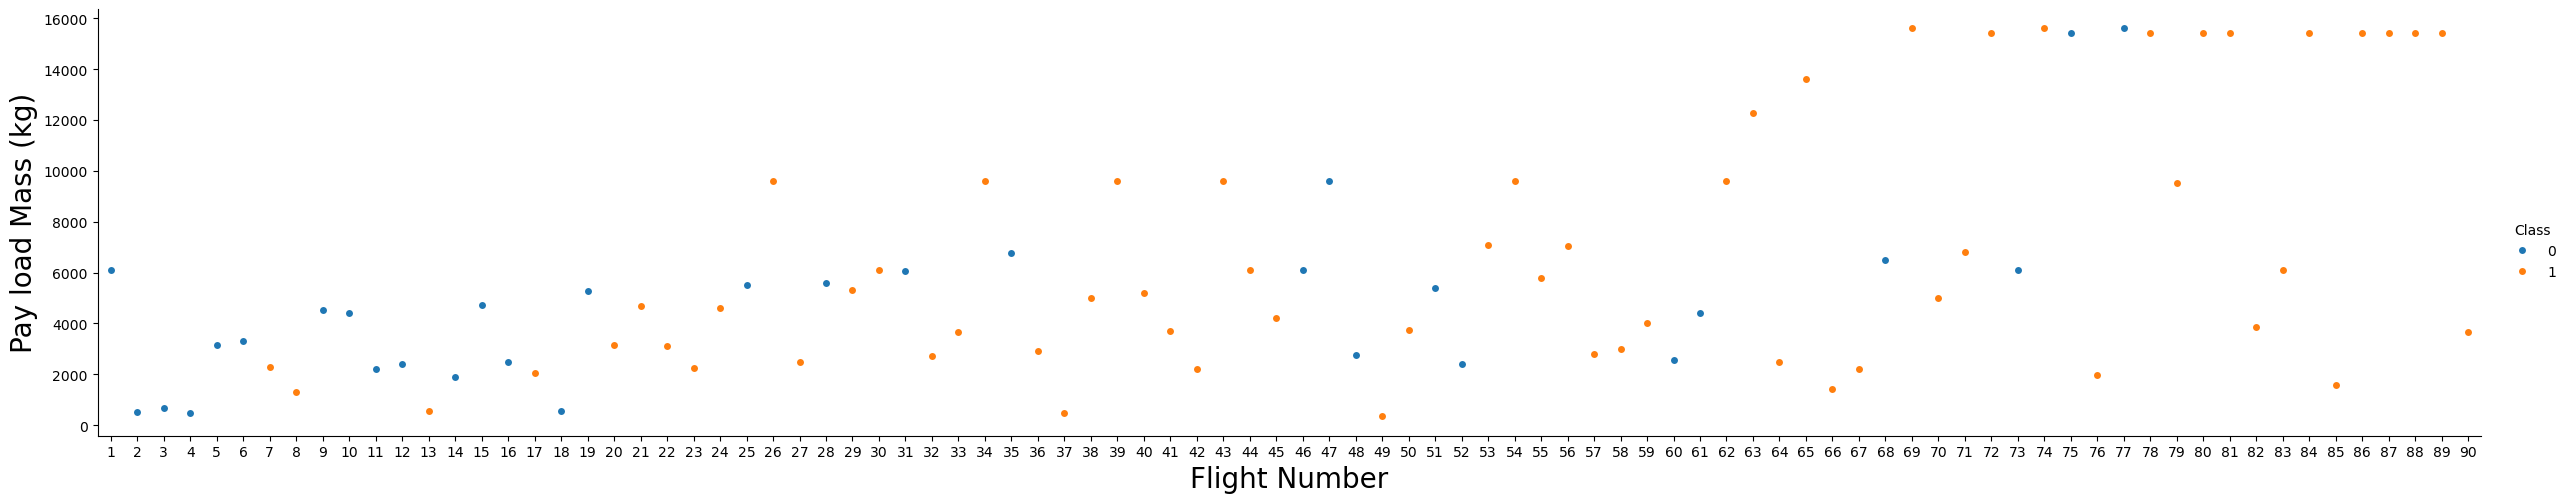

In [23]:
#  let's see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

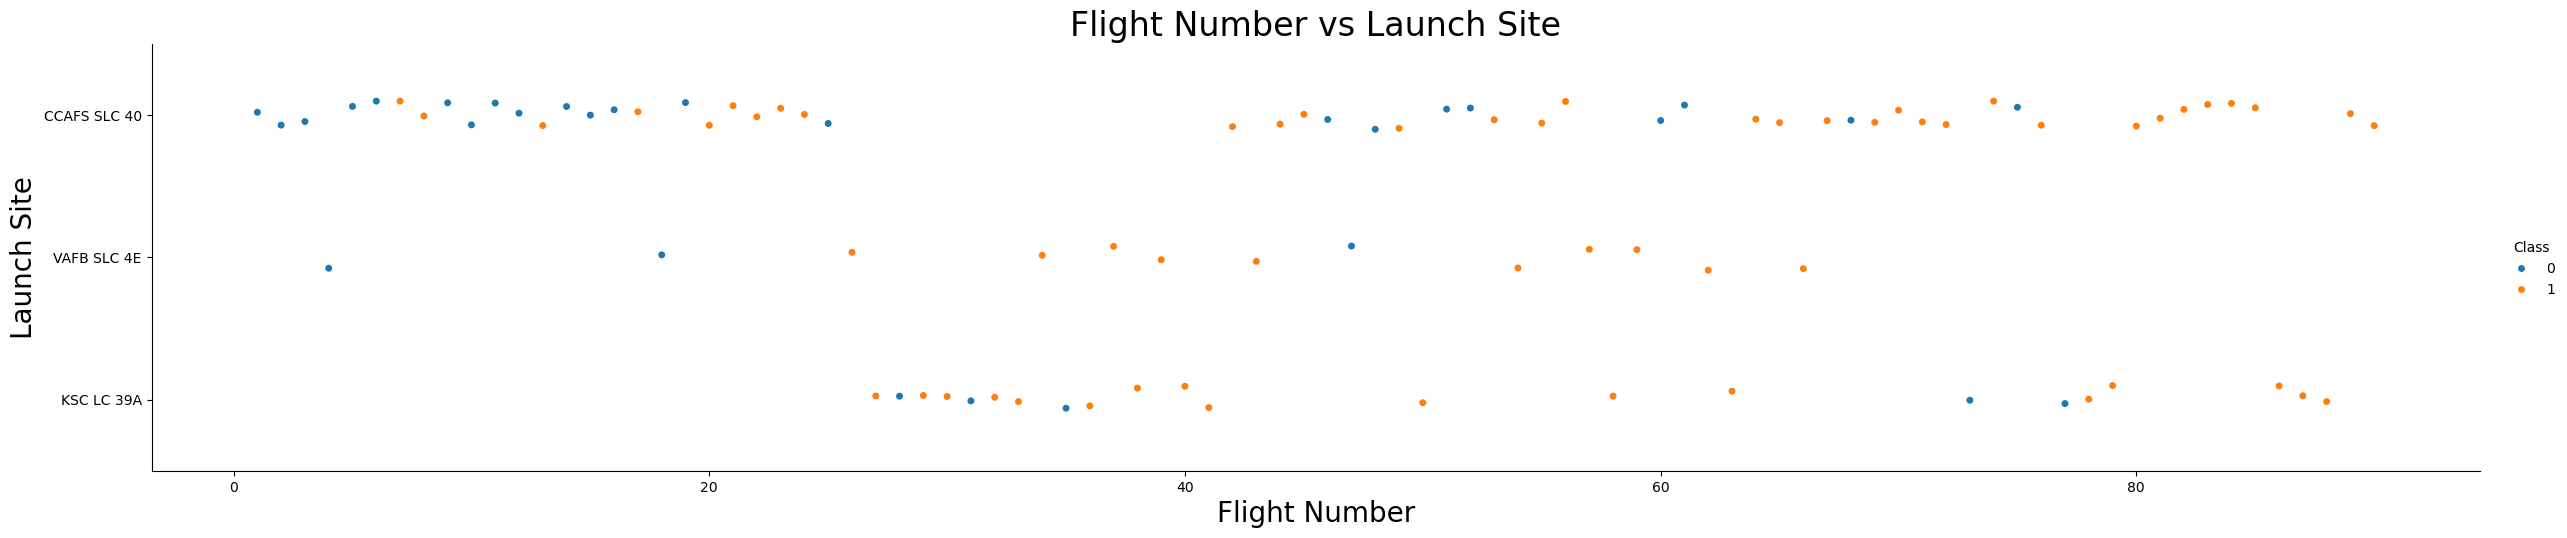

In [25]:
# Create the catplot
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5, kind="strip")

# Set the labels
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Flight Number vs Launch Site", fontsize=24)
plt.show()

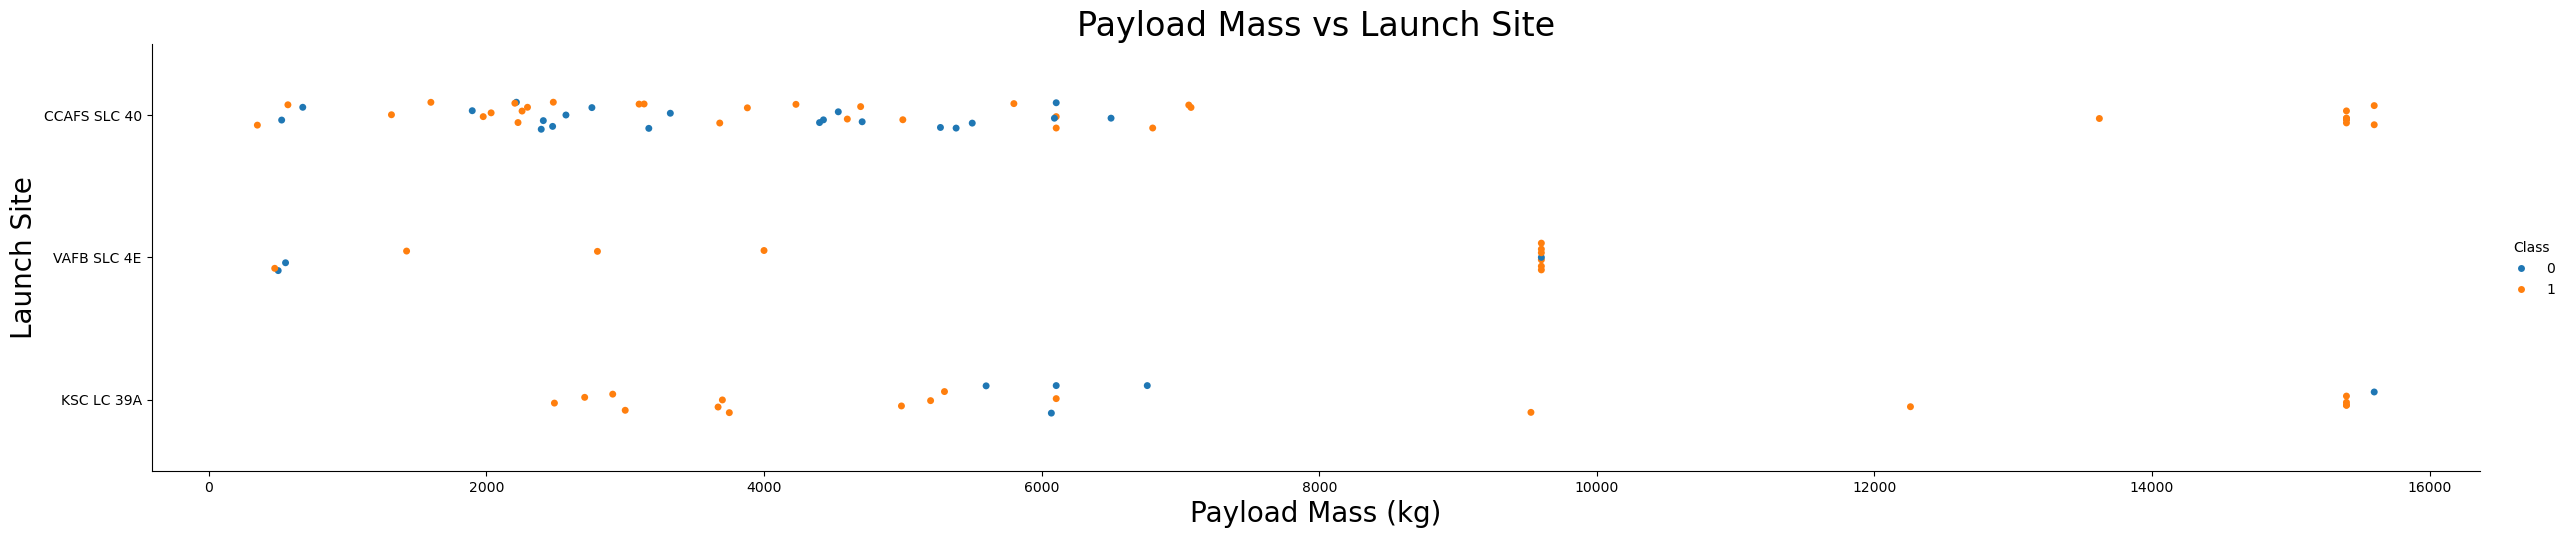

In [27]:
# Create the catplot
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=5, kind="strip")

# Set the labels and title
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Payload Mass vs Launch Site", fontsize=24)
plt.show()


In [33]:
# Calculate the success rate for each orbit type
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
success_rate.columns = ['Orbit', 'Success Rate']  # Rename columns for clarity

C:\Users\santi\AppData\Local\Temp\ipykernel_16148\1837700230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Success Rate', y='Orbit', data=success_rate, palette='viridis')


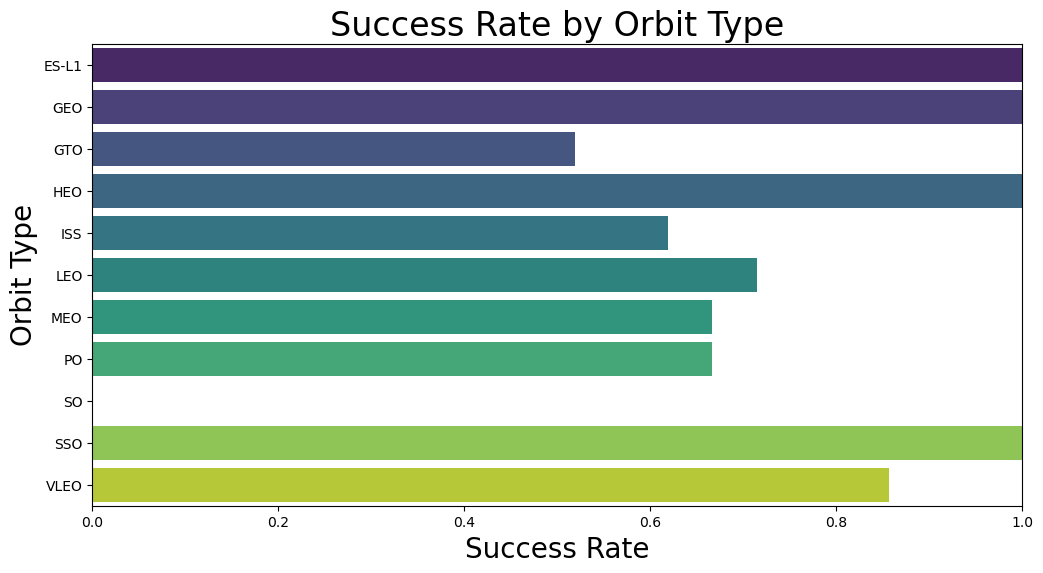

In [35]:
# Create a bar chart for success rates of each orbit type
plt.figure(figsize=(12, 6))
sns.barplot(x='Success Rate', y='Orbit', data=success_rate, palette='viridis')

# Set the labels and title
plt.xlabel("Success Rate", fontsize=20)
plt.ylabel("Orbit Type", fontsize=20)
plt.title("Success Rate by Orbit Type", fontsize=24)
plt.xlim(0, 1)  # Set x-axis limit from 0 to 1
plt.show()


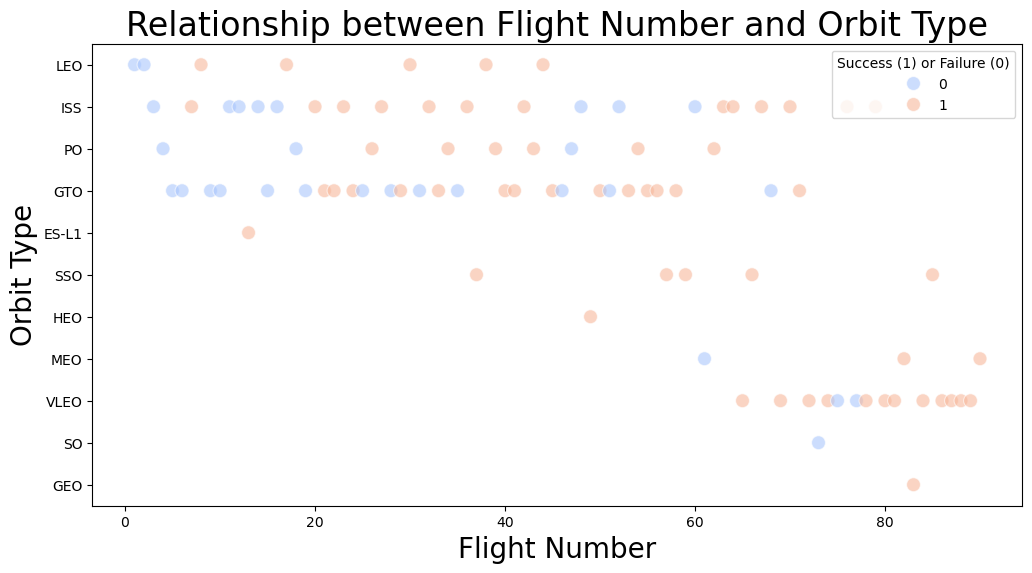

In [37]:
# Create a scatter plot for FlightNumber vs Orbit type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df, palette='coolwarm', alpha=0.6, s=100)

# Set the labels and title
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit Type", fontsize=20)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=24)
plt.legend(title='Success (1) or Failure (0)', loc='upper right')
plt.show()

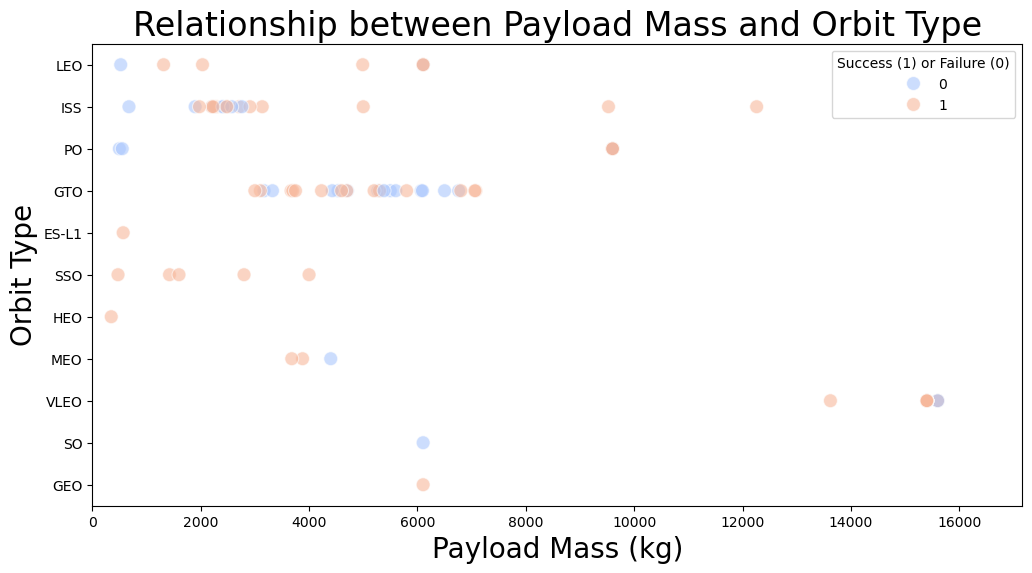

In [41]:
# Create a scatter plot for Payload Mass vs Orbit type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, palette='coolwarm', alpha=0.6, s=100)

# Set the labels and title
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit Type", fontsize=20)
plt.title("Relationship between Payload Mass and Orbit Type", fontsize=24)
plt.legend(title='Success (1) or Failure (0)', loc='upper right')
plt.xlim(0, df['PayloadMass'].max() * 1.1)  # Adjust xlim for better visualization
plt.show()


In [47]:
# Extracting the year from the Date column
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Call the function and assign the extracted year to a new column in the DataFrame
Extract_year()
df['Year'] = year

In [51]:
# Calculate average success rate by year
success_rate_by_year = df.groupby('Year')['Class'].mean().reset_index()

# Rename the columns for better readability
success_rate_by_year.columns = ['Year', 'Average Success Rate']

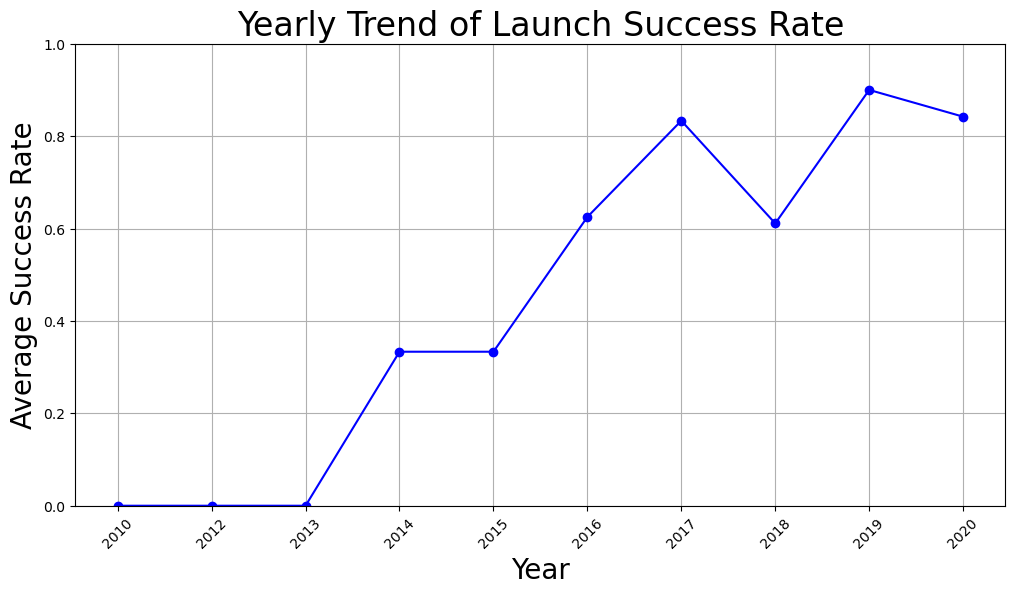

In [53]:
# Plot a line chart for average success rate by year
plt.figure(figsize=(12, 6))
plt.plot(success_rate_by_year['Year'], success_rate_by_year['Average Success Rate'], marker='o', color='b')

# Set labels and title
plt.xlabel("Year", fontsize=20)
plt.ylabel("Average Success Rate", fontsize=20)
plt.title("Yearly Trend of Launch Success Rate", fontsize=24)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid()  # Add grid for better visualization
plt.show()

In [55]:
# Assuming you already have the features DataFrame created
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 
                'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 
                'ReusedCount', 'Serial']]

# Create dummy variables for specified categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=True)

In [59]:
# Step 1: Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')

# Step 2: Export to CSV
features_one_hot.to_csv('dataset_part_3.csv', index=False)

# Optionally, confirm the changes by printing the data types
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 76, dtype: object
